### This notebook compares DESI "magnitudes" with LSSTComCom magnitdues

Usual imports

In [2]:
import tables_io
import numpy as np
import matplotlib.pyplot as plt

Change this to be the root of the current PZ working area

In [3]:
pz_dir = '/global/cfs/cdirs/lsst/groups/PZ/DP1'
# if that fails you can use this
# pz_dir = '/global/u2/e/echarles/dx'

Get the data

In [4]:
t = tables_io.read(f'{pz_dir}/data/sandbox_data/desi/desi_dp1_matches.fits')

In [5]:
t.columns

<TableColumns names=('coord_ra','coord_dec','g_cModelMag','g_cModelMagErr','g_gaap1p0Mag','g_gaap1p0MagErr','g_gaap3p0Mag','g_gaap3p0MagErr','g_kronMag','g_kronMagErr','g_psfMag','g_psfMagErr','g_sersicMag','g_sersicMagErr','r_cModelMag','r_cModelMagErr','r_gaap1p0Mag','r_gaap1p0MagErr','r_gaap3p0Mag','r_gaap3p0MagErr','r_kronMag','r_kronMagErr','r_psfMag','r_psfMagErr','r_sersicMag','r_sersicMagErr','i_cModelMag','i_cModelMagErr','i_gaap1p0Mag','i_gaap1p0MagErr','i_gaap3p0Mag','i_gaap3p0MagErr','i_kronMag','i_kronMagErr','i_psfMag','i_psfMagErr','i_sersicMag','i_sersicMagErr','z_cModelMag','z_cModelMagErr','z_gaap1p0Mag','z_gaap1p0MagErr','z_gaap3p0Mag','z_gaap3p0MagErr','z_kronMag','z_kronMagErr','z_psfMag','z_psfMagErr','z_sersicMag','z_sersicMagErr','DESI_SEP_ARCSEC','g_DESI','r_DESI','i_DESI','z_DESI','zred_DESI','TARGETID','DELTACHI2','DESINAME','DESI_RA','DESI_DEC')>

Plot the DESI magnitude v the ComCam PSF magnitude

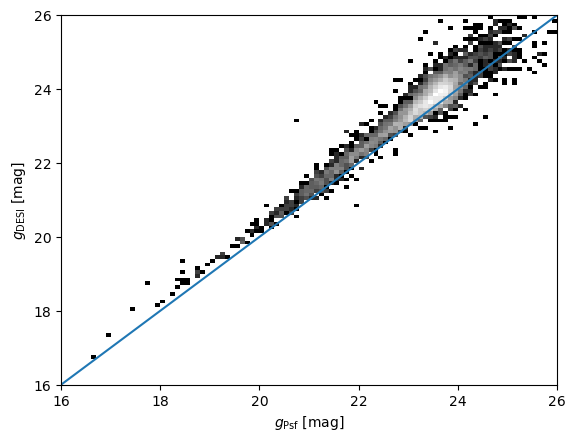

In [6]:
_ = plt.hist2d(t['g_psfMag'], t['g_DESI'], bins=(np.linspace(16, 26, 101), np.linspace(16, 26, 101)), cmap='gray', norm='log')
_ = plt.plot([16,26],[16,26])
_ = plt.xlabel(r'$g_{\rm Psf}$ [mag]')
_ = plt.ylabel(r'$g_{\rm DESI}$ [mag]')

In [20]:
def plot_scatter(t, flux_type, bands):
    fig = plt.figure()
    axes = fig.subplots(2, 2)
    for i, band in enumerate(bands):
        icol = i%2
        irow = int(i/2)
        axs = axes[irow][icol]
        axs.hist2d(t[f"{band}_{flux_type}Mag"], t[f'{band}_DESI'], bins=(np.linspace(16, 26, 101), np.linspace(16, 26, 101)), cmap='gray', norm='log')
        axs.plot([16,26],[16,26])
        axs.set_xlabel(f'{band} {flux_type} [mag]')
        axs.set_ylabel(f'{band} DESI [mag]')
    fig.tight_layout()

In [25]:
def plot_resid(t, flux_type, bands):
    fig = plt.figure()
    axes = fig.subplots(2, 2)
    for i, band in enumerate(bands):
        icol = i%2
        irow = int(i/2)
        axs = axes[irow][icol]
        axs.hist2d(t[f"{band}_{flux_type}Mag"], t[f'{band}_DESI']-t[f"{band}_{flux_type}Mag"], bins=(np.linspace(16, 26, 101), np.linspace(-2, 2, 101)), cmap='gray', norm='log')
        axs.plot([16,26],[16,26])
        axs.set_xlabel(f'{band} {flux_type} [mag]')
        axs.set_ylabel(f'{band} DESI [mag]')
    fig.tight_layout()

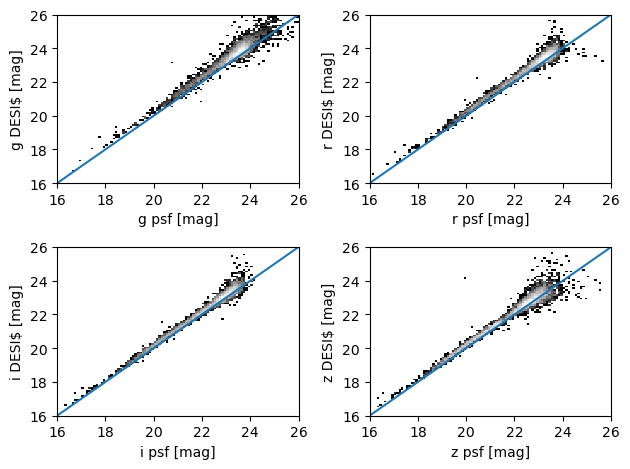

In [26]:
plot_scatter(t, 'psf', 'griz')

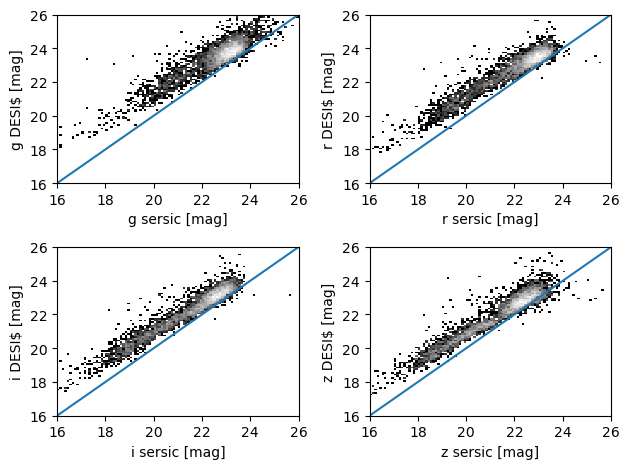

In [27]:
plot_scatter(t, 'sersic', 'griz')

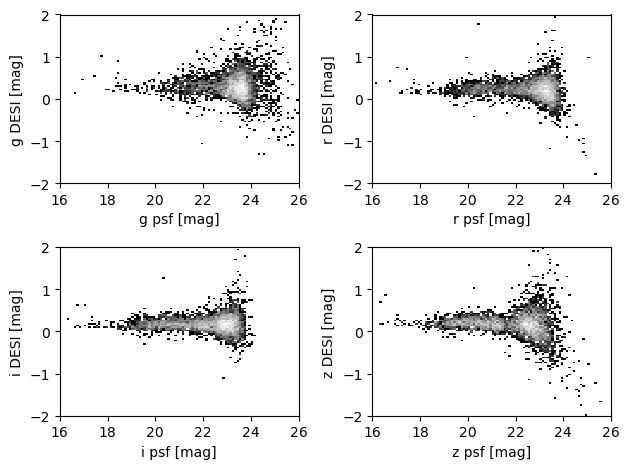

In [28]:
plot_resid(t, 'psf', 'griz')